In [1]:
import pandas as pd
# from torchvision import datasets
import torch

import os

In [2]:
# from torch import datasets

In [3]:
datapath = '/Users/kaustubhchaudhuri/Lab/Personal/Datasets/StudentTestScore'
filename = 'train.csv'

In [4]:
df = pd.read_csv(os.path.join(datapath, filename))

In [5]:
df.shape

(630000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [7]:
# Check for NA's
df.isna().any()

id                  False
age                 False
gender              False
course              False
study_hours         False
class_attendance    False
internet_access     False
sleep_hours         False
sleep_quality       False
study_method        False
facility_rating     False
exam_difficulty     False
exam_score          False
dtype: bool

In [8]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [ ]:
from sklearn.preprocessing import (LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import 

from sklearn.impute import

from sklearn.pipeline import
from sklearn.compose import

from sklearn.linear_model import
from sklearn.ensemble import
from sklearn.cluster import


In [12]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    OneHotEncoder,
    LabelEncoder
)

from sklearn.impute import SimpleImputer


In [13]:
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)

from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor
)

from sklearn.cluster import KMeans

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [15]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    mean_squared_error,
    r2_score
)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import (
    SelectKBest,
    f_classif,
    f_regression
)

In [17]:
cat_feat = ['gender', 'course',
'internet_access',
'sleep_quality',
'study_method',
'facility_rating',
'exam_difficulty']

In [18]:
df[cat_feat]

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
0,female,b.sc,no,average,online videos,low,easy
1,other,diploma,yes,poor,self-study,medium,moderate
2,female,b.sc,yes,poor,coaching,high,moderate
3,male,b.sc,yes,average,group study,high,moderate
4,male,bca,yes,good,self-study,high,easy
...,...,...,...,...,...,...,...
629995,female,b.tech,yes,good,mixed,high,moderate
629996,female,ba,yes,average,mixed,low,moderate
629997,male,bca,yes,poor,online videos,low,moderate
629998,male,b.com,yes,average,group study,high,moderate


In [19]:
num_feat = ['age',
'study_hours',
'class_attendance',
'sleep_hours',
'study_method']

op = 'exam_score'

In [20]:
corr = df.corr(numeric_only=True)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

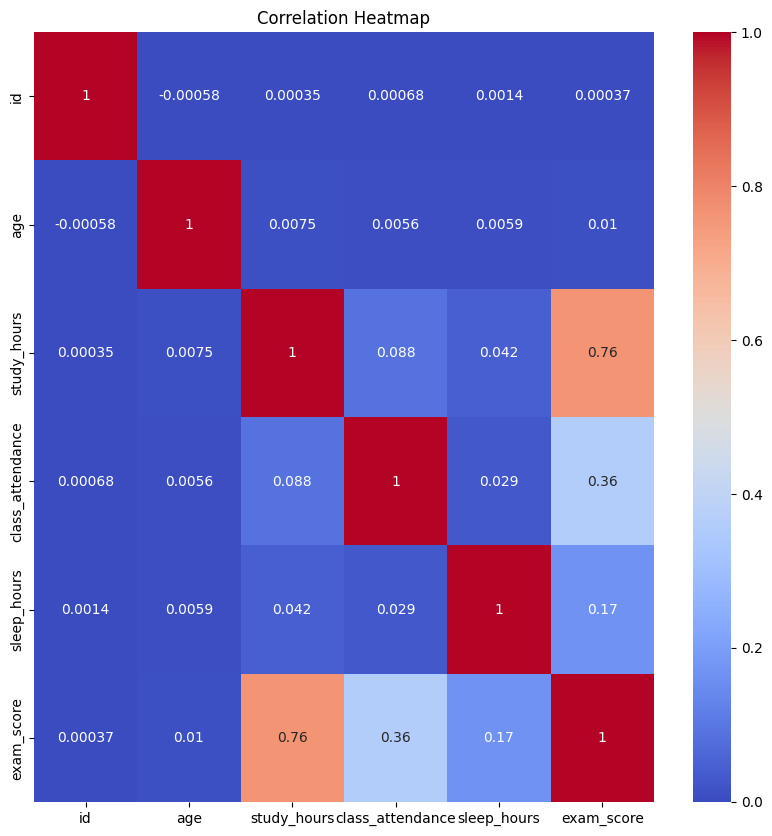

In [22]:
# For Plotting

# Define the figure size
plt.figure(figsize=(10, 10))

sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            # fmt=".2f"
           )
plt.title("Correlation Heatmap")

plt.show()

In [25]:
# Defining the pipeline

preprocessor = ColumnTransformer(
                    transformers=[
                        ('num_pipeline', StandardScaler, num_feat),
                        ('cat_pipeline', LabelEncoder, cat_feat)
                    ]
                )

In [28]:
pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', LinearRegression())
    ]
)